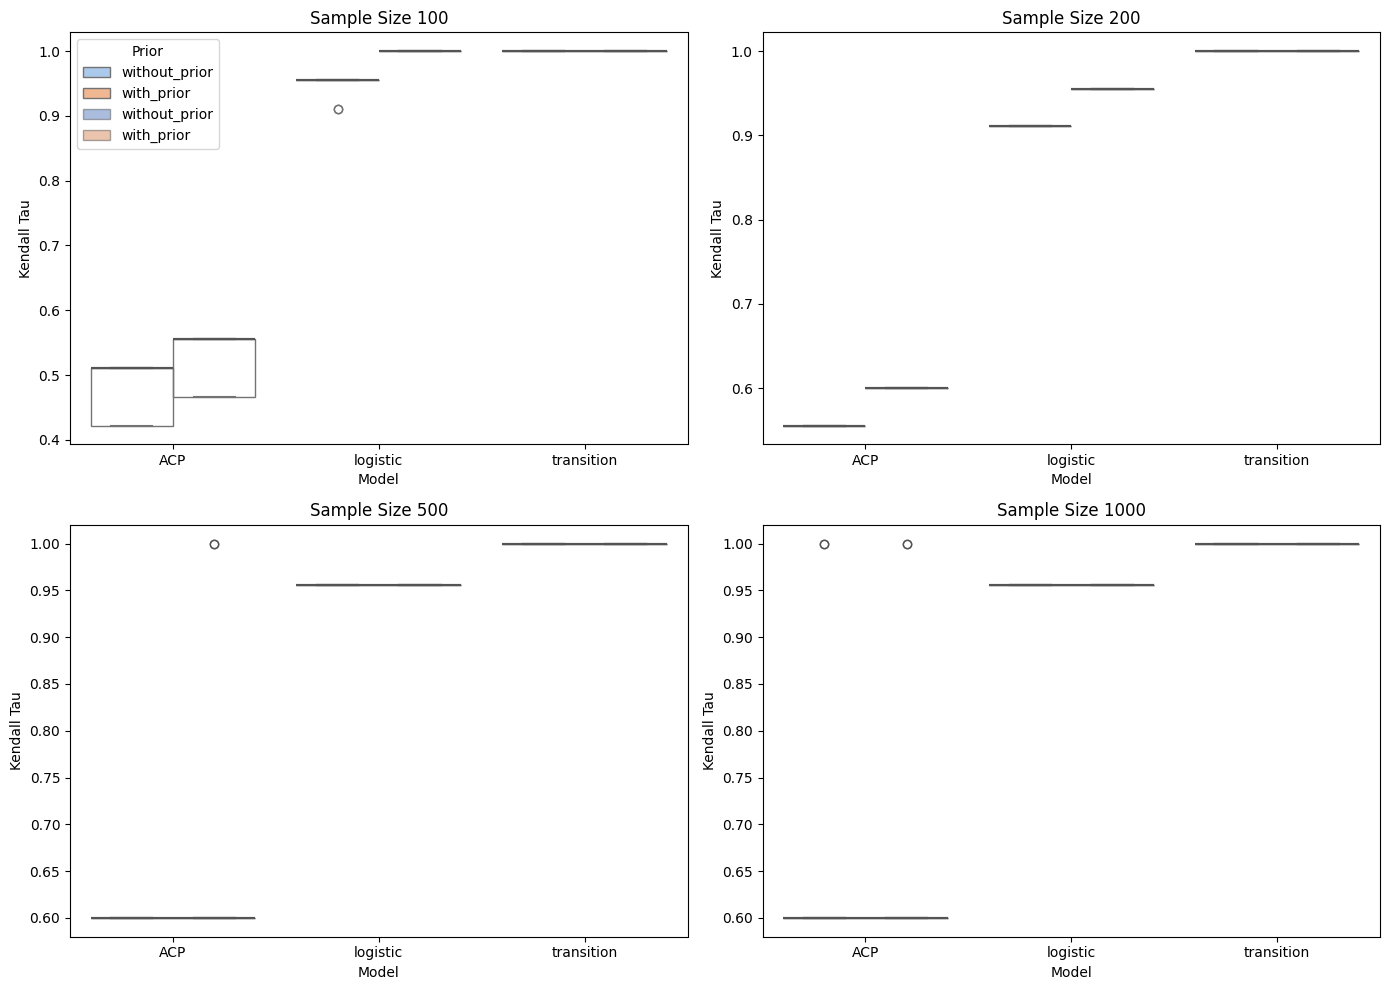

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

def load(filenames):
    all_data = []
    for filename in filenames:
        base_name = os.path.basename(filename)
        parts = base_name.split('_')
        model_name = parts[0]
        sample_size = parts[-1].split('n')[-1].replace('.csv', '')
        prior = 'with_prior' if 'prior' in base_name else 'without_prior'
        
        df = pd.read_csv(filename)
        
        df['model'] = model_name
        df['sample_size'] = sample_size
        df['prior'] = prior
        
        df = df[['greedy_kendalltau', 'greedy_spearmanr', 'best_kendalltau', 'best_spearmanr', 'model', 'sample_size', 'prior']]
        all_data.append(df)

    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data

sample_filenames = [
    'results/ACP_results_n100.csv',
    'results/ACP_results_n200.csv',
    'results/ACP_results_n500.csv',
    'results/ACP_results_n1000.csv',
    'results/ACP_results_prior_n100.csv',
    'results/ACP_results_prior_n200.csv',
    'results/ACP_results_prior_n500.csv',
    'results/ACP_results_prior_n1000.csv',
    'results/logistic_results_n100.csv',
    'results/logistic_results_n200.csv',
    'results/logistic_results_n500.csv',
    'results/logistic_results_n1000.csv',
    'results/logistic_results_prior_n100.csv',
    'results/logistic_results_prior_n200.csv',
    'results/logistic_results_prior_n500.csv',
    'results/logistic_results_prior_n1000.csv',
    'results/transition_results_n100.csv',
    'results/transition_results_n200.csv',
    'results/transition_results_n500.csv',
    'results/transition_results_n1000.csv',  
    'results/transition_results_prior_n100.csv',
    'results/transition_results_prior_n200.csv',
    'results/transition_results_prior_n500.csv',
    'results/transition_results_prior_n1000.csv'
]

data = load(sample_filenames)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_overlaid_boxplots(data, sample_sizes):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Create 2x2 subplot
    axes = axes.flatten()  # Flatten the axes for easier indexing
    
    for i, sample_size in enumerate(sample_sizes):
        ax = axes[i]
        subset = data[data['sample_size'] == sample_size]
        
        # Greedy Kendall Tau
        sns.boxplot(x='model', y='greedy_kendalltau', hue='prior', data=subset, ax=ax, 
                    palette='pastel', dodge=True, 
                    boxprops=dict(facecolor='none'),  # No facecolor for transparency
                    whiskerprops=dict(linewidth=1.5),
                    capprops=dict(linewidth=1.5),
                    medianprops=dict(linewidth=1.5))
        
        # Best Kendall Tau overlaid
        sns.boxplot(x='model', y='best_kendalltau', hue='prior', data=subset, ax=ax, 
                    palette='muted', dodge=True, 
                    boxprops=dict(alpha=0.5),  # Set alpha for best boxplot
                    whiskerprops=dict(linewidth=1.5),
                    capprops=dict(linewidth=1.5),
                    medianprops=dict(linewidth=1.5))
        
        ax.set_title(f'Sample Size {sample_size}')
        ax.set_ylabel('Kendall Tau')
        ax.set_xlabel('Model')
        
        # Only display one legend
        if i == 0:
            ax.legend(title='Prior')
        else:
            ax.get_legend().remove()
    
    plt.tight_layout()
    plt.show()

# Assuming 'data' is already loaded
sample_sizes = ['100', '200', '500', '1000']
create_overlaid_boxplots(data, sample_sizes)



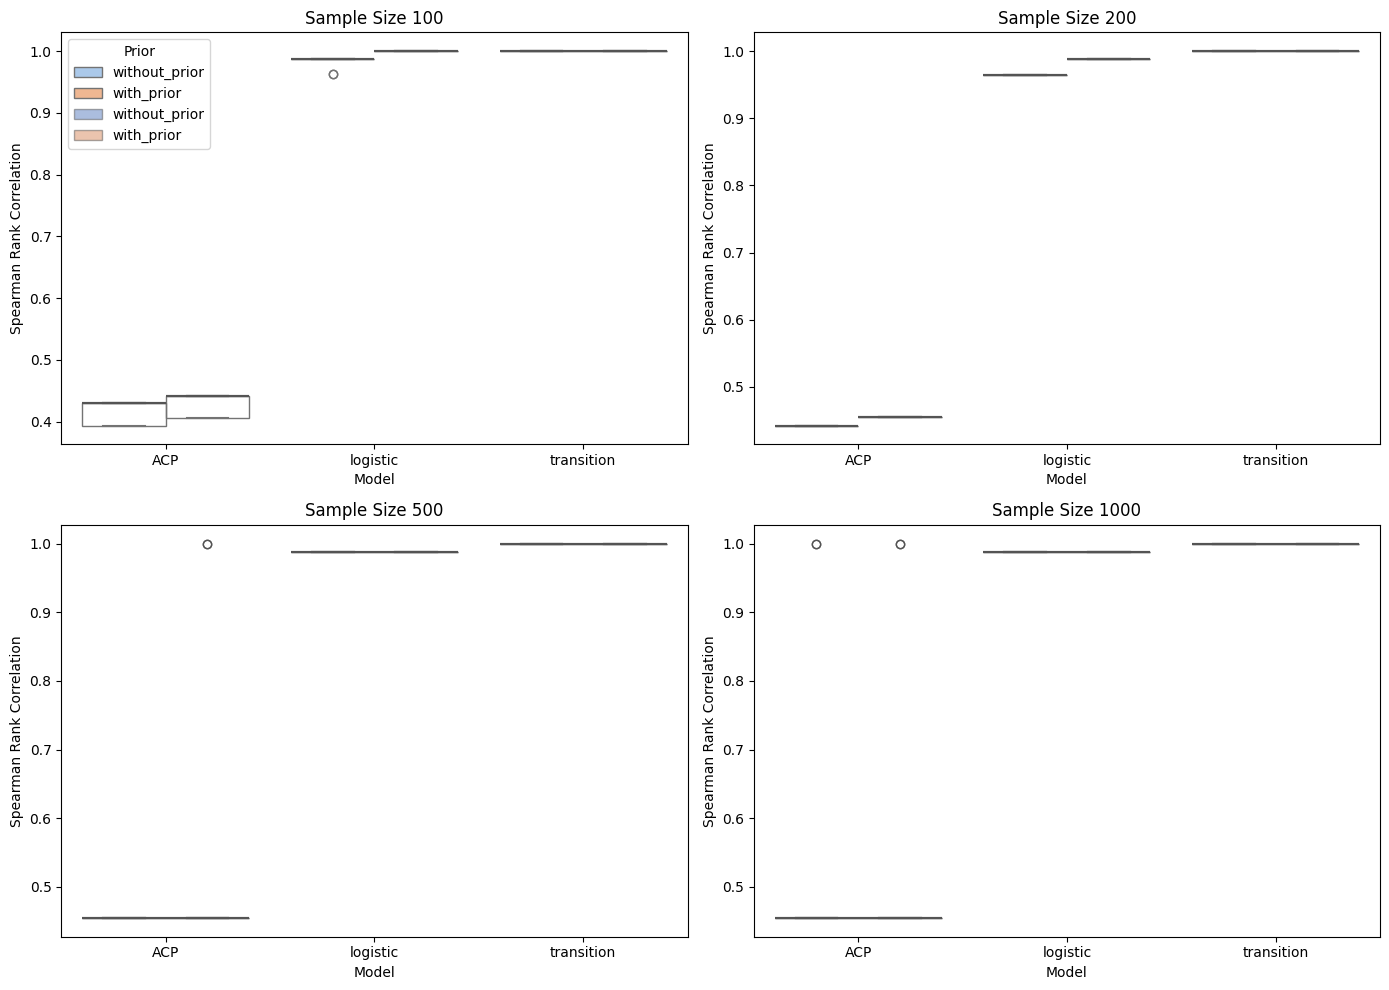

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_overlaid_spearman_boxplots(data, sample_sizes):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Create 2x2 subplot
    axes = axes.flatten()  # Flatten the axes for easier indexing
    
    for i, sample_size in enumerate(sample_sizes):
        ax = axes[i]
        subset = data[data['sample_size'] == sample_size]
        
        # Greedy Spearmanr
        sns.boxplot(x='model', y='greedy_spearmanr', hue='prior', data=subset, ax=ax, 
                    palette='pastel', dodge=True, 
                    boxprops=dict(facecolor='none'),  # No facecolor for transparency
                    whiskerprops=dict(linewidth=1.5),
                    capprops=dict(linewidth=1.5),
                    medianprops=dict(linewidth=1.5))
        
        # Best Spearmanr overlaid
        sns.boxplot(x='model', y='best_spearmanr', hue='prior', data=subset, ax=ax, 
                    palette='muted', dodge=True, 
                    boxprops=dict(alpha=0.5),  # Set alpha for best boxplot
                    whiskerprops=dict(linewidth=1.5),
                    capprops=dict(linewidth=1.5),
                    medianprops=dict(linewidth=1.5))
        
        ax.set_title(f'Sample Size {sample_size}')
        ax.set_ylabel('Spearman Rank Correlation')
        ax.set_xlabel('Model')
        
        # Only display one legend
        if i == 0:
            ax.legend(title='Prior')
        else:
            ax.get_legend().remove()
    
    plt.tight_layout()
    plt.show()

# Assuming 'data' is already loaded
sample_sizes = ['100', '200', '500', '1000']
create_overlaid_spearman_boxplots(data, sample_sizes)
